In [1]:
import numpy as np # data in a vectorized manner manipulation
import pandas as pd # data analsysis
import matplotlib.pyplot as plt  # plotting library
import seaborn as sns # plotting library

from sklearn.pipeline import Pipeline   #Regression Analysis Lib
from sklearn.preprocessing import StandardScaler,PolynomialFeatures #Regression Analysis Lib
%matplotlib inline

In [2]:
import requests # HTTP library
from bs4 import BeautifulSoup # scraping library
import io  #convert Geospatial_data from csv

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [3]:
file_name="http://data.insideairbnb.com/canada/on/toronto/2019-08-08/data/listings.csv.gz"
df = pd.read_csv(file_name, compression='gzip', error_bad_lines=False)
df.shape

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(21617, 106)

In [4]:
# iterating the columns 
for col in df.columns: 
    print(col) 

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_ni

In [5]:
# Choose just the columns that you need for analysing process
df_analysis = df[['id', \
'listing_url', \
'street', \
'neighbourhood', \
'neighbourhood_cleansed', \
'neighbourhood_group_cleansed', \
'city', \
'state', \
'zipcode', \
'country', \
'latitude', \
'longitude', \
'property_type', \
'room_type', \
'bedrooms', \
'beds', \
'bed_type', \
'price', \
'weekly_price', \
'monthly_price', \
'minimum_nights', \
'maximum_nights', \
'has_availability', \
'availability_365', \
'number_of_reviews', \
'last_review', \
'review_scores_rating', \
'review_scores_cleanliness', \
'review_scores_location', \
'reviews_per_month']]

#### Now it is necessary to check how many "Null" or "NaN" values are in all our data

In [6]:
# columns with more than 15% missing data
cols_missing_some_data_15 = set(df_analysis.columns[df_analysis.isnull().mean() > 0.15])

# columns with more than 25% missing data
cols_missing_some_data_25 = set(df_analysis.columns[df_analysis.isnull().mean() > 0.25])

# columns with more than 50% missing data
cols_missing_lots_data = set(df_analysis.columns[df_analysis.isnull().mean() > 0.50])

print("Missing more than 15%", cols_missing_some_data_15)
print("Missing more than 25%", cols_missing_some_data_25)
print("Missing more than 50%", cols_missing_lots_data)

Missing more than 15% {'neighbourhood_group_cleansed', 'review_scores_cleanliness', 'reviews_per_month', 'review_scores_location', 'monthly_price', 'review_scores_rating', 'last_review', 'weekly_price'}
Missing more than 25% {'neighbourhood_group_cleansed', 'monthly_price', 'weekly_price'}
Missing more than 50% {'neighbourhood_group_cleansed', 'monthly_price', 'weekly_price'}


#### Fortunately, the most relevant columns for this analysis process were not detected in this null value inspection.

But we found that the "price" column has the values expressed in String format "$ 0.000.00" therefore, it will be necessary to change it to a numerical format in order to perform the analysis and the graphs.

In [7]:
def convert_currency(val):
    """
    Convert the string number value to a float
     - Remove $
     - Remove commas
     - Convert to float type
    """
    new_val = val.replace(',','').replace('$', '')
    return float(new_val)

In [8]:
print(df_analysis['price'].head(10))

0    $470.00
1    $100.00
2     $67.00
3     $72.00
4    $199.00
5     $55.00
6    $133.00
7    $125.00
8     $69.00
9     $90.00
Name: price, dtype: object


In [9]:
df_analysis['price'] = df_analysis['price'].apply(convert_currency)
print(df_analysis['price'].head(10))

0    470.0
1    100.0
2     67.0
3     72.0
4    199.0
5     55.0
6    133.0
7    125.0
8     69.0
9     90.0
Name: price, dtype: float64


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


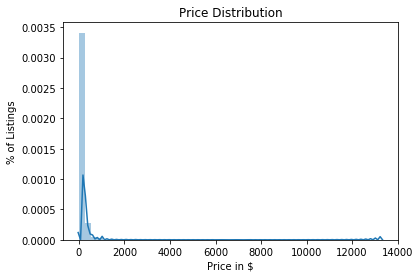

In [10]:
ax = sns.distplot(df_analysis.price)
ax.set(xlabel='Price in $', ylabel='% of Listings')
plt.title('Price Distribution')
plt.show()

#### Is very import remove (listings priced more than 3x standard deviation)

In [11]:
#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
#------------------------------------------------------------------------------
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [12]:
#create new dataframe remove price more than 3x standard deviation 
new_data = df_analysis[((df_analysis.price - df_analysis.price.mean()) / df_analysis.price.std()).abs() < 3]
new_data.shape

(21434, 30)

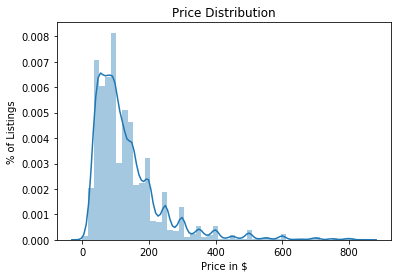

In [13]:
ax = sns.distplot(new_data.price)
ax.set(xlabel='Price in $', ylabel='% of Listings')
plt.title('Price Distribution')
plt.show()

In [14]:
# Neighbourhood with highest rates
grouped_by_hood = new_data.groupby('neighbourhood')
hood_mean = grouped_by_hood.mean()[['price']]
display(hood_mean.sort_values(by=['price'], ascending=False).head(20).round(2))

,price
neighbourhood,
Toronto Islands,214.71
Markland Woods,203.12
Entertainment District,200.67
The Kingsway,197.93
Downtown Montreal,196.00
Humber Valley,193.47
Yorkville,190.96
Harbourfront,190.62
Nortown,186.06


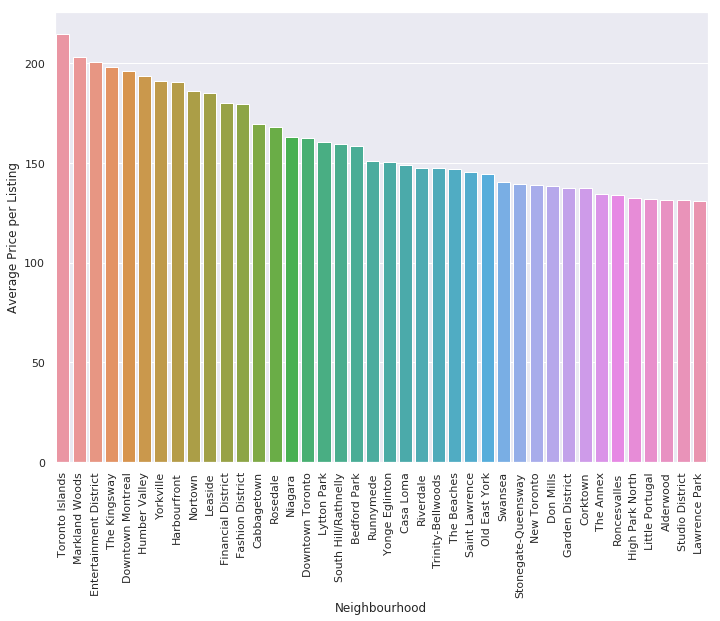

In [15]:
# Neighbourhood with highest rates
Neighbourhood_highestprice_sorted = hood_mean.sort_values(by=['price'], ascending=False).round(2).head(40)

sns.set(rc={'figure.figsize':(11.7,8.27)})
price_graph = sns.barplot(x=Neighbourhood_highestprice_sorted.index, y=Neighbourhood_highestprice_sorted.price)
price_graph.set_xticklabels(labels=price_graph.get_xticklabels(), rotation=90);
price_graph.set_xlabel('Neighbourhood');
price_graph.set_ylabel('Average Price per Listing');

### Which property types are the most common in Toronto?

In [16]:
property_type_counts = (new_data['property_type'].value_counts() / new_data.shape[0]) * 100
property_types_sorted = property_type_counts.sort_values(ascending=False)
display(property_types_sorted)

Apartment                 29.462536
Condominium               26.901185
House                     26.429971
Townhouse                  4.581506
Guest suite                3.984324
Bungalow                   3.345153
Loft                       1.968835
Serviced apartment         1.031072
Guesthouse                 0.569189
Villa                      0.508538
Boutique hotel             0.312587
Bed and breakfast          0.298591
Other                      0.228609
Hostel                     0.107306
Barn                       0.046655
Hotel                      0.041989
Tiny house                 0.037324
Boat                       0.032658
Camper/RV                  0.023327
Cottage                    0.018662
Cabin                      0.009331
Cave                       0.009331
Aparthotel                 0.009331
Casa particular (Cuba)     0.009331
Train                      0.004665
Treehouse                  0.004665
Castle                     0.004665
Earth house                0

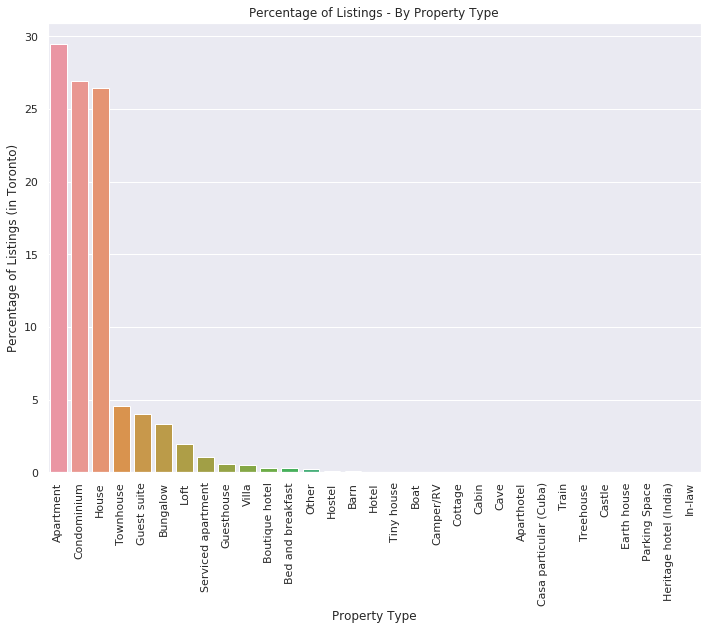

In [17]:
property_types_graph = sns.barplot(x=property_types_sorted.index, y=property_types_sorted)
property_types_graph.set_xticklabels(labels=property_types_graph.get_xticklabels(), rotation=90);
property_types_graph.set_title('Percentage of Listings - By Property Type')
property_types_graph.set_xlabel('Property Type');
property_types_graph.set_ylabel('Percentage of Listings (in Toronto)');

### Which property types are the most expensive in Toronto?

In [18]:
grouped_by_type = new_data.groupby('property_type')
type_mean = grouped_by_type.mean()[['price']]
price_by_type_sorted = type_mean.sort_values(by=['price'], ascending=False).round(2).head(13)
display(price_by_type_sorted.head(13))

,price
property_type,
Aparthotel,218.00
Boutique hotel,196.06
Serviced apartment,186.73
Loft,178.15
Condominium,170.73
Camper/RV,164.00
Townhouse,133.99
Hotel,131.11
Boat,130.00


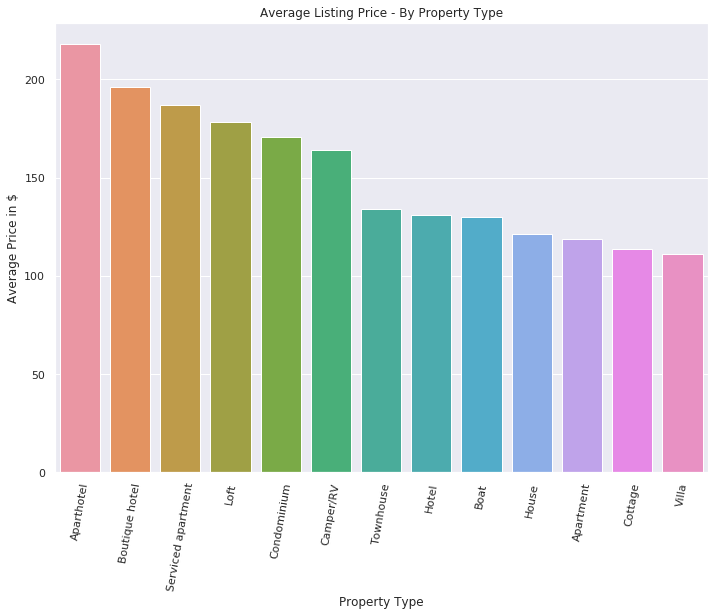

In [19]:
price_by_type_sorted_graph = sns.barplot(x=price_by_type_sorted.index, y=price_by_type_sorted.price)
price_by_type_sorted_graph.set_xticklabels(labels=price_by_type_sorted_graph.get_xticklabels(), rotation=80);
price_by_type_sorted_graph.set_title('Average Listing Price - By Property Type')
price_by_type_sorted_graph.set_xlabel('Property Type');
price_by_type_sorted_graph.set_ylabel('Average Price in $');

In [20]:
# Neighbourhood with highest rates
grouped_by_neighbourhood = new_data.groupby('neighbourhood')
hood_mean_location = grouped_by_neighbourhood.mean()[['price','latitude','longitude']]
display(hood_mean_location)

,price,latitude,longitude
neighbourhood,,,
Agincourt,79.856115,43.795855,-79.276149
Alderwood,131.500000,43.605593,-79.542426
Amesbury,117.333333,43.697568,-79.485729
Armour Heights,114.305882,43.757473,-79.414700
Bayview,81.200000,43.796649,-79.383074
Bayview Village,129.206349,43.777312,-79.380146
Beachborough,40.000000,43.695150,-79.495290
Bedford Park,158.673077,43.729406,-79.406570
Bendale,71.976744,43.759462,-79.253619


In [21]:
hood_mean_location_top20=hood_mean_location.sort_values(by=['price'], ascending=False).round(2).head(20)

hood_mean_location_top20

,price,latitude,longitude
neighbourhood,,,
Toronto Islands,214.71,43.63,-79.38
Markland Woods,203.12,43.63,-79.57
Entertainment District,200.67,43.64,-79.39
The Kingsway,197.93,43.66,-79.51
Downtown Montreal,196.00,43.65,-79.39
Humber Valley,193.47,43.67,-79.52
Yorkville,190.96,43.67,-79.39
Harbourfront,190.62,43.64,-79.38
Nortown,186.06,43.73,-79.42


In [22]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [23]:
# create map of Toronto using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)
i=0
# add markers to map
for lat, lng, price in zip(hood_mean_location_top20['latitude'], hood_mean_location_top20['longitude'], hood_mean_location_top20['price'] ):
    i=i+1
    new_label=str(i)+'. $'+str(price)
    label = folium.Popup(new_label, parse_html=True, max_width=100)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#8931cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

## Data Modeling

#### Now, we can build a Linear Regression model and then later inspect the coefficients of that model

In [24]:
def train_test(df, response_col='price', dummy_na=False, test_size=.3, rand_state=42, plot=False):
    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)
    
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)
    
    train_preds = lm_model.predict(X_train)
    test_preds = lm_model.predict(X_test)
    
    train_score = r2_score(y_train, train_preds)
    test_score = r2_score(y_test, test_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test, test_preds